### A/B testing various metrics of Counter Strike matches
Counter-Strike: Global Offensive (CS:GO) is a 2012 multiplayer tactical first-person shooter developed by Valve and Hidden Path Entertainment.

The game has an active esports scene, continuing the history of international competitive play from previous games in the series. Teams compete in professional leagues and tournaments, with the game often cited as being among the best in esports.

Two opposing teams, the Terrorists and the Counter-Terrorists, compete in game modes to repeatedly complete objectives, such as securing a location to plant or defuse a bomb and rescuing or capturing hostages

### First A/B test - "Ranking Impact"
    Test: Investigate the correlation between the HLTV rankings (rank column) and match winner.
    Hypothesis: Higher-ranked teams may have a higher likelihood of winning matches, demonstrating the influence of team rankings on match outcomes.

### Null Hypothesis:
    There is a correlation between the HLTV rankings and match performance.

### Alternative Hypothesis:
    There is no correlation between the HLTV rankings and match performance.

In [1]:
import pandas as pd
from scipy.stats import spearmanr, chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('results.csv')

In [3]:
df.head(5)

,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
0,2020-03-18,Recon 5,TeamOne,Dust2,0,16,2,2,0,1,0,15,5151,2340454,62,63,0,2,2
1,2020-03-18,Recon 5,TeamOne,Inferno,13,16,2,2,8,6,5,10,5151,2340454,62,63,0,2,2
2,2020-03-18,New England Whalers,Station7,Inferno,12,16,2,1,9,6,3,10,5243,2340461,140,118,12,16,2
3,2020-03-18,Rugratz,Bad News Bears,Inferno,7,16,2,2,0,8,7,8,5151,2340453,61,38,0,2,2
4,2020-03-18,Rugratz,Bad News Bears,Vertigo,8,16,2,2,4,5,4,11,5151,2340453,61,38,0,2,2


### Legend of data
* rank_1 and rank_2 - HLTV rank of each team
* ct_1,	t_2, t_1 and ct_2 - score of teams at specific side
* starting_ct - team that plays as CT in the first half of the game
* result_1 and result_2 - scores of teams
* map_wins_1 and map_wins_2	- Number of maps won by team 1 or 2. Only shows correct values for bo3s (Best of 3 - they play max 5 maps, winner of 3 maps wins the match)

In [4]:
alpha = 0.05

In [5]:
rankings_team1 = df['rank_1']
rankings_team2 = df['rank_2']
match_winner = df['match_winner']

correlation_coefficient, p_value = spearmanr(rankings_team1, rankings_team2)

print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: There is no correlation between HLTV rankings and match performance.")
else:
    print("Fail to reject the null hypothesis: There is a correlation between HLTV rankings and match performance.")

Correlation Coefficient: 0.670654388073472
P-value: 0.0
Reject the null hypothesis: There is no correlation between HLTV rankings and match performance.


In [6]:
total_matches = len(df)
higher_rank_winner_matches = df[df['rank_1'] < df['rank_2']]['match_winner'].value_counts().get(1, 0)

percentage_higher_rank_winner = (higher_rank_winner_matches / total_matches) * 100

print(f"Percentage of matches where the winner has a higher rank: {percentage_higher_rank_winner:.2f}%")

Percentage of matches where the winner has a higher rank: 38.22%


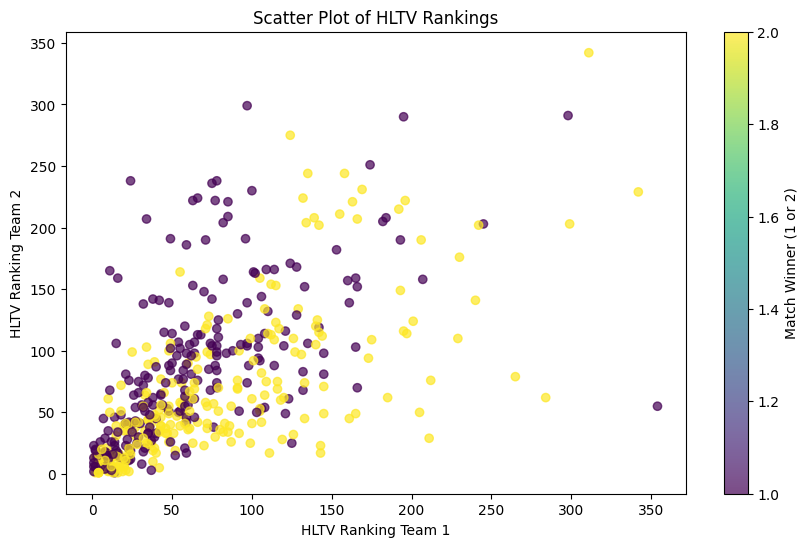

In [7]:
sampled_df = df.sample(frac=0.01)

plt.figure(figsize=(10, 6))
plt.scatter(sampled_df['rank_1'], sampled_df['rank_2'], c=sampled_df['match_winner'], cmap='viridis', alpha=0.7)
plt.title('Scatter Plot of HLTV Rankings')
plt.xlabel('HLTV Ranking Team 1')
plt.ylabel('HLTV Ranking Team 2')
plt.colorbar(label='Match Winner (1 or 2)')
plt.show()

As we can see, there is no correlation between HLTV rankings and match performance. First, let's see how this rating was calculated. Information taken from [liquipedia](https://liquipedia.net/counterstrike/HLTV)

### Rating 1.0
Rating 1.0 is the first version of rating system from HLTV which was introduced in 2010. It was based on three components:
- KPR (Kills per round)
- DPR (Deaths per round)
- Impact (A value based on number of rounds with multiple kills)

### Rating 2.0
Rating 2.0 is the updated rating system from HLTV which was first implemented in 2016 and officially introduced on June 14th, 2017. Compared to Rating 1.0, Rating 2.0 includes more components, namely:
- ADR (Average damage per round)
- KAST (% of rounds with at least a kill, assist, survival or traded death)
- Impact Rating (Updated formula based on multi-kills, opening kills, 1onX wins and more)

A game can be won not only by killing  the opposite team. It also can be won by plant bomb and rescue hostages. So, this ranking is based on team performance that not include such metrics as plant bombs, defusing them or rescue hostages.

### Other factors

Game fatigue: matches at the beginning of the season when the team is not yet tired from the game can have a completely different result from matches at the end of the season when the team is already tired.

Unsuitable weapons for the maps: the team has chosen an unsuitable weapon for a particular map

Map selection factor: the team may have played on a map on which they have not practiced as much, which can have a bad effect on the result.

### Summary
As we can see higher HLTV rank not means that team have higher skill in game and higher rank also not means that team have higher chances to win the match. The outcome of the match is influenced by too many factors and the result of the match cannot be predicted using only HLTV rating

In [8]:
team_1_counts = df['team_1'].value_counts()
print(team_1_counts)

team_1
Astralis              540
Liquid                527
Virtus.pro            526
FaZe                  514
TYLOO                 510
                     ... 
100pinggods             1
MARKandLARRY            1
Balderisnor             1
ex-Next Generation      1
Tortues Ninja           1
Name: count, Length: 1248, dtype: int64


### Second test - Map Performance
    Test: Compare the win rates of teams on different maps.
    Hypothesis: Teams may have varying levels of proficiency on different maps. Some maps may favor certain playstyles or strategies, leading to differences in win rates.

### Null Hypothesis:
There is no significant difference in the win rates of teams on different maps.

### Alternative Hypothesis:
There is a significant difference in the win rates of teams on different maps.

In [9]:
top_teams = df['team_1']._append(df['team_2']).value_counts().head(60).index
df_w_top_teams = df[(df['team_1'].isin(top_teams)) & (df['team_2'].isin(top_teams))]
contingency_table = pd.crosstab(df_w_top_teams['_map'], df_w_top_teams['map_winner'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")

Chi-Square Value: 11.668439631426697
P-value: 0.23265289879162598


In [10]:
df_w_top_teams.value_counts()

date        team_1      team_2       _map         result_1  result_2  map_winner  starting_ct  ct_1  t_2  t_1  ct_2  event_id  match_id  rank_1  rank_2  map_wins_1  map_wins_2  match_winner
2015-11-03  NiP         Dignitas     Train        16        4         1           2            4     1    12   3     1934      2299001   6       12      16          4           1               1
2018-09-07  Gambit      HellRaisers  Overpass     14        16        2           1            8     7    6    9     3885      2326363   19      15      14          16          2               1
2018-09-04  Windigo     AGO          Dust2        7         16        2           1            5     10   2    6     3961      2326379   38      25      0           2           2               1
                                     Overpass     10        16        2           1            9     6    1    10    3961      2326379   38      25      0           2           2               1
                        ENCE  

In [11]:
if p < alpha:
    print("Reject the null hypothesis. There is a significant difference in win rates among maps.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in win rates among maps.")

Fail to reject the null hypothesis. There is no significant difference in win rates among maps.


### Summary

As we can see, there is no significant difference in the win rates of teams on different maps. For the simplicity of the test, we have selected only 60 teams that have played the most matches.So, in out test we used data from about twelve thousand matches. 

From the results of the test we can assume that professional players in cyber sports teams are sufficiently trained and their game results do not depend on the map or depend insignificantly.